## Introduction to Conjugate Gradient Methods

The *conjugate gradient methods* are frequently used for solving large linear systems of equations and also for solving nonlinear optimization problems. This let us characterize the *conjugate gradient methods* into two classes:

* **Linear Conjugate Gradient Method**: This is an iterative method to solve large linear systems where the coefficient matrices are positive definite. This can be treated as a replacement of the *Gaussian elimination method* in numerical analysis.
* **nonlinear Conjugate Gradient method**: This is used for solving nonlinear optimization problems. We will study five methods under this class:
  * *Fletcher-Reeves algorithm*,
  * *Polak-Ribiere algorithm*,
  * *Hestenes-Stiefel algorithm*,
  * *Dai-Yuan algorithm*, and
  * *Hager-Zhang algorithm*.

### Linear Conjugate Gradient Method

In the *linear conjugate gradient* method, the direction $\mathbb{\delta}_j$ is a linear combination of the preceding direction $\mathbb{\delta}_{j-1}$ and the negative of the residual $-\mathbb{r}_j$. So we can write,
\begin{equation}
    \mathbb{\delta}_j = \chi_j \mathbb{\delta}_{j-1} - \mathbb{r}_j \label{eq:1}\tag{1}
\end{equation}

Now, to evaluate $\chi_j$, we multiply Eq.\eqref{eq:1} non-commutatively with the preceding factor $\mathbb{\delta}_{j-1}^T\mathbb{A}$ and use the mutual conjugacy condition that $\mathbb{\delta}_{j-1}^T\mathbb{A}\mathbb{\delta}_j=0$. \begin{equation}
    \mathbb{\delta}_{j-1}^T\mathbb{A}\mathbb{\delta}_j = \chi_j\mathbb{\delta}_{j-1}^T\mathbb{A}\mathbb{\delta}_{j-1} - \mathbb{\delta}_{j-1}^T\mathbb{A}\mathbb{r}_j = 0 \label{eq:2}\tag{2}
\end{equation}  

So, we see that,
\begin{align}
    \chi_j &= \frac{\mathbb{\delta}_{j-1}^T\mathbb{A}\mathbb{r}_j}{\mathbb{\delta}_{j-1}^T\mathbb{A}\mathbb{\delta}_{j-1}} \nonumber \\
    &= \frac{(\mathbb{A}\mathbb{r}_j)^T\mathbb{\delta}_{j-1}}{\mathbb{\delta}_{j-1}^T\mathbb{A}\mathbb{\delta}_{j-1}} \nonumber \\
    &= \frac{\mathbb{r}_j^T\mathbb{A}^T\mathbb{\delta}_{j-1}}{\mathbb{\delta}_{j-1}^T\mathbb{A}\mathbb{\delta}_{j-1}} \nonumber \\
    &= \frac{\mathbb{r}_j^T\mathbb{A}\mathbb{\delta}_{j-1}}{\mathbb{\delta}_{j-1}^T\mathbb{A}\mathbb{\delta}_{j-1}} \label{eq:3}\tag{3}
\end{align}

The *residual* of a linear system of equations, is defined as:
\begin{equation}
    r(\mathbb{x}) = \mathbb{A}\mathbb{x} - \mathbb{b}
\end{equation}

### An Example

Let us consider an objective function given by:
\begin{equation}
    f(x_1, x_2) = \frac{x_1^2}{2} + x_1x_2 + x_2^2-2x_2 \label{eq:4}\tag{4}
\end{equation}

Finding the minimizer of this objective function is equivalent to finding the solution to the equation given by $\mathbb{A}\mathbb{x} = \mathbb{b}$, where $\mathbb{A} = \begin{bmatrix} \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & 1\end{bmatrix}$, $\mathbb{x} = \begin{bmatrix}x_1 \\ x_2\end{bmatrix}$ and $\mathbb{b} = \begin{bmatrix}0 \\2\end{bmatrix}$. So, we use the *linear conjugate gradient algorithm* to solve
\begin{equation}
    \begin{bmatrix} \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & 1\end{bmatrix} \begin{bmatrix}x_1 \\ x_2\end{bmatrix} = \begin{bmatrix}0 \\2\end{bmatrix} \label{eq:5}\tag{5}
\end{equation}
 
where, we will consider the starting iterate to be $\begin{bmatrix}-2.3 \\ 2.2 \end{bmatrix}$ tolerance $\epsilon =10^{-5}$. As usual, let us first define the objective function in Python.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import autograd.numpy as au
from autograd import grad, jacobian
import scipy

def f(x): # Define the objective function
    return x[0]**2/2 + x[0]*x[1] + x[1]**2 - 2*x[1]

Next we define the matrix $\mathbb{A}$ and the vector $\mathbb{b}$ in Python.

In [3]:
A = np.array(([1/2, 1/2], [1/2, 1]), dtype=float)
b = np.array([0., 2.])

We can make it sure that $\mathbb{A}$ is actually a symmetric positive definite matrix.

In [4]:
eigs = np.linalg.eigvals(A)
print("The eigenvalues of A:", eigs)
if (np.all(eigs>0)):
    print("A is positive definite")
elif (np.all(eigs>=0)):
    print("A is positive semi-definite")
else:
    print("A is negative definite")

The eigenvalues of A: [0.19098301 1.30901699]
A is positive definite


In [5]:
if (A.T==A).all()==True: print("A is symmetric")

A is symmetric


Now we write the Python function `linear_CG()` that implements the *linear conjugate gradient algorithm*


In [6]:
def linear_CG(x, A, b, epsilon):
    res = A.dot(x) - b # Initialize the residual
    delta = -res # Initialize the descent direction
    
    while True:
        
        if np.linalg.norm(res) <= epsilon:
            return x, f(x) # Return the minimizer x* and the function value f(x*)
        
        D = A.dot(delta)
        beta = -(res.dot(delta))/(delta.dot(D)) # Line (11) in the algorithm
        x = x + beta*delta # Generate the new iterate
        res = A.dot(x) - b # generate the new residual
        chi = res.dot(D)/(delta.dot(D)) # Line (14) in the algorithm 
        delta = chi*delta -  res # Generate the new descent direction

Finally, we pass the parameters that we consider for this example to the function `linear_CG()`.


In [7]:
linear_CG(np.array([2.3, -2.2]), A, b, 10**-5)

(array([-4.,  4.]), 0.0)

We see that the solution is $\mathbb{x^*} \sim \begin{bmatrix}-4 \\ 4 \end{bmatrix}$ and the function value at this point is $0$. We can verify the result is correct by following the trivial solution:

\begin{align}
    \begin{bmatrix}x_1 \\ x_2\end{bmatrix} &= \begin{bmatrix} \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & 1\end{bmatrix}^{-1} \begin{bmatrix}0 \\2\end{bmatrix} \nonumber \\
    &= \begin{bmatrix}-4 \\ 4\end{bmatrix} \label{eq:6}\tag{6}
\end{align}

We can even write a Python code to check the above case:

In [8]:
np.linalg.inv(A).dot(b)

array([-4.,  4.])

We see that our Python implementation of the *linear conjugate gradient algorithm* works perfectly. We will now discuss *nonlinear conjugate gradient algorithms* in the next section


## Nonlinear Conjugate Gradient Algorithm

We can modify our *conjugate gradient method* to optimize convex nonlinear objective functions. The first method that we study under this class is the *Fletcher-Reeves* method.

### Feltcher-Reeves Algorithm

The first application of the *Conjugate Gradient Method* on nonlinear objective functions was introduced by Fletcher and Reeves. The directions $\mathbb{\delta}_j$ given by Fletcher and Reeves are mutually conjugate with respect to the symmetric positive definite matrix $\mathbb{A}$. The descent direction is given by,

\begin{equation}
    \mathbb{\delta}_{j+1} =
    \begin{cases}
    -\nabla f(\mathbb{x}_j),\ \ j=0 \\
    -\nabla f(\mathbb{x}_j) + \chi_j\mathbb{\delta}_j,\ \ j=1, 2, \ldots, n-1 \label{eq:7}\tag{7}
    \end{cases}
\end{equation}

In the above equation,
\begin{equation}
    \mathbb{x}_j = \mathbb{x}_{j-1}+\beta_j\mathbb{\delta}_j \label{eq:8}\tag{8}
\end{equation}

where $\beta_j$ is the $j^{th}$ step length. $\chi_j$ is given by,
\begin{equation}
    \chi_j = \frac{\|\nabla f(\mathbb{x}_j)\|^2}{\|\nabla f(\mathbb{x}_{j-1})\|^2} \label{eq:9}\tag{9}
\end{equation}

### An Example

Let us consider an objective function having the form,
\begin{equation}
    f(x_1, x_2) = x_1^4 - 2x_1^2x_2+x_1^2 + x_2^2-2x_1+1 \label{eq:10}\tag{10}
\end{equation}
The function has a local minimizer at $f(1, 1) = 0$. We will implement the *Fletcher-Reeves algorithm* in Python to figure out the minimizer. Let the starting iterate be given by $\mathbb{x}_j = \begin{bmatrix}2 \\ -1.8 \end{bmatrix}$, the tolerance be $\epsilon = 10^{-5}$ and the constants to be used for determining the step length using the *strong Wolfe conditions* be $\alpha_1=10^{-4}$ and $\alpha_2=0.38$. Let us first define the objective function and its gradient in Python.


In [9]:
def func(x): # Objective function
    return x[0]**4 - 2*x[0]**2*x[1] + x[0]**2 + x[1]**2 - 2*x[0] + 1
Df = grad(func) # Gradient of the objective function

Next we define the function `Fletcher_Reeves()` in Python:


In [11]:
from scipy.optimize import line_search
NORM = np.linalg.norm
def Fletcher_Reeves(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    D = Df(Xj)
    delta = -D # Initialize the descent direction
    
    while True:
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta #Newly updated experimental point
        
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            return X, func(X) # Return the results
        else:
            Xj = X
            d = D # Gradient at the preceding experimental point
            D = Df(Xj) # Gradient at the current experimental point
            chi = NORM(D)**2/NORM(d)**2 # Line (16) of the Fletcher-Reeves algorithm
            delta = -D + chi*delta # Newly updated descent direction
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]
            
Fletcher_Reeves(np.array([2., -1.8]), 10**-5, 10**-4, 0.38)

(array([0.99999267, 0.99998207]), 6.445799449750211e-11)

We notice that, for our choice of parameters, the algorithm has converged to the minimizer $\mathbb{x}^* \sim \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ with $f(\mathbb{x}^*) \sim 0$. The figure showing the optimization trajectory is shown below:


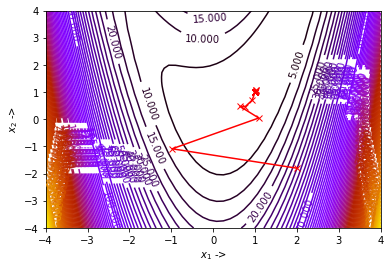

,x_1,x_2,f(X),||grad||
0,2.000000,-1.800000,3.464000e+01,49.770674
1,-0.980320,-1.085708,8.110795e+00,12.666170
2,1.089661,0.047228,1.307942e+00,5.631099
3,0.642619,0.473047,1.313317e-01,0.877485
4,0.766371,0.466510,6.917852e-02,0.260336
5,0.932517,0.704482,3.181377e-02,0.583346
6,1.014900,1.060079,1.125428e-03,0.110081
7,1.023572,1.059599,6.972306e-04,0.023851
8,1.024886,1.054728,6.381285e-04,0.033152
9,1.005438,0.999549,1.585278e-04,0.060937


In [12]:
import pandas as pd

def func(x): # Objective function
    #return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
    return x[0]**4 - 2*x[0]**2*x[1] + x[0]**2 + x[1]**2 - 2*x[0] + 1
Df = grad(func) # Gradient of the objective function
x1 = np.linspace(-4, 4, 50)
x2 = np.linspace(-4, 4, 50)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])
contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")
def Fletcher_Reeves(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    D = Df(Xj)
    delta = -D
    F = [func(Xj)]
    DF = [NORM(Df(Xj))]
    
    while True:
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            F += [func(X)]
            DF += [NORM(Df(X))]
            plt.plot(x1, x2, "rx-", ms=5.5) # Plot the final collected data showing the trajectory of optimization
            plt.show()
            data = {'x_1': x1,
            'x_2': x2,
            'f(X)': F,
            '||grad||': DF}
            return data
        else:
            Xj = X
            d = D
            D = Df(Xj)
            chi = NORM(D)**2/NORM(d)**2
            delta = -D + chi*delta
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]
            F += [func(Xj)]
            DF += [NORM(Df(Xj))]
#data=Fletcher_Reeves(np.array([2., -1.8]), 10**-6, 10**-4, 0.2)
data = Fletcher_Reeves(np.array([2., -1.8]), 10**-5, 10**-4, 0.38)

df = pd.DataFrame(data, columns = ['x_1', 'x_2', 'f(X)', '||grad||'])
df

### Polak-Ribiere Algorithm

One of the variants of the *Fletcher-Reeves algorithm* is the *Polak-Ribiere algorithm*, where, the $\chi_j$ is given by:
\begin{equation}
    \chi_j = \frac{[\nabla f(\mathbb{x}_j) - \nabla f(\mathbb{x}_{j-1})]^T\nabla f(\mathbb{x}_j)}{\|\nabla f(\mathbb{x}_{j-1})\|^2} \label{eq:11}\tag{11}
\end{equation}

One important characteristic to notice here is that, the *strong Wolfe conditions* do not guarantee the direction $\mathbb{\delta}_j$ will always be a descent direction in the *Polak-RIbiere algorithm*. Then, $\chi$ needs to modified in the following way:
\begin{equation}
    \chi_j = \max\{0, \chi_j\} \label{eq:12}\tag{12}
\end{equation}

This ensures that the *strong wolfe conditions* guarantee a descent direction . The *Polak-Ribiere algorithm* reduces back to the *Fletcher-Reeves algorithm* if the objective function is strongly convex quadratic, and the line search is exact.

### An Example

Let us again consider the same objective function as the previous example. We will implement the *Polak-Ribiere algorithm* in Python to figure out the minimizer. Let the starting iterate be given by $\mathbb{x}_j = \begin{bmatrix}-1.7 \\ -3.2 \end{bmatrix}$, the tolerance be $\epsilon = 10^{-6}$ and the constants to be used for determining the step length using the *strong Wolfe conditions* be $\alpha_1=10^{-4}$ and $\alpha_2=0.2$. We define the function `Polak_Ribiere()` in Python:


In [13]:
def Polak_Ribiere(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    D = Df(Xj)
    delta = -D # Initialize the descent direction
    
    while True:
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta # Newly updated experimental point 
        
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            return X, func(X) # Return the results
        else:
            Xj = X
            d = D # Gradient of the preceding experimental point
            D = Df(Xj) # Gradient of the current experimental point
            chi = (D-d).dot(D)/NORM(d)**2 
            chi = max(0, chi) # Line (16) of the Polak-Ribiere Algorithm
            delta = -D + chi*delta # Newly updated direction
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]
            
Polak_Ribiere(np.array([-1.7, -3.2]), 10**-6, 10**-4, 0.2)

(array([1., 1.]), 0.0)

We notice that, for our choice of parameters, the algorithm has converged to the minimizer $\mathbb{x}^* \sim \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ with $f(\mathbb{x}^*) \sim 0$. The Figure showing the optimization trajectory is shown below:


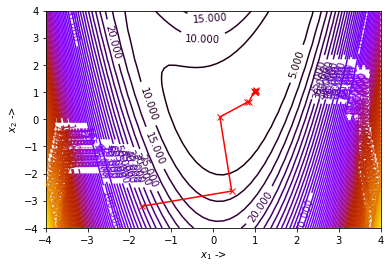

,x_1,x_2,f(X),||grad||
0,-1.700000,-3.200000,4.437810e+01,4.837061e+01
1,0.444052,-2.642140,8.370827e+00,6.906687e+00
2,0.160431,0.084541,7.083336e-01,1.720896e+00
3,0.813837,0.626715,3.592512e-02,2.660946e-01
4,0.851657,0.637222,2.976676e-02,1.762273e-01
5,0.985178,1.028612,3.587781e-03,2.832207e-01
6,1.016092,1.062585,1.167555e-03,1.086004e-01
7,1.023796,1.057443,6.524615e-04,2.089008e-02
8,0.999780,1.000208,4.684337e-07,3.297285e-03
9,1.000015,1.000036,2.629112e-10,1.347683e-05


In [14]:
x1 = np.linspace(-4, 4, 50)
x2 = np.linspace(-4, 4, 50)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])
contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")
def Polak_Ribiere(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    D = Df(Xj)
    delta = -D
    F = [func(Xj)]
    DF = [NORM(Df(Xj))]
    
    while True:
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            F += [func(X)]
            DF += [NORM(Df(X))]
            plt.plot(x1, x2, "rx-", ms=5.5) # Plot the final collected data showing the trajectory of optimization
            plt.show()
            data = {'x_1': x1,
            'x_2': x2,
            'f(X)': F,
            '||grad||': DF}
            return data
        else:
            Xj = X
            d = D
            D = Df(Xj)
            chi = (D-d).dot(D)/NORM(d)**2
            chi = max(0, chi)
            delta = -D + chi*delta
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]
            F += [func(Xj)]
            DF += [NORM(Df(Xj))]
data=Polak_Ribiere(np.array([-1.7, -3.2]), 10**-6, 10**-4, 0.2)

df = pd.DataFrame(data, columns = ['x_1', 'x_2', 'f(X)', '||grad||'])
df

### Hager-Zhang Algorithm

In this variant (See Nocedal and Wright) we have
\begin{equation}
    \chi_j = \mathbb{M}_j^T\mathbb{N}_j \label{eq:13}\tag{13}
\end{equation}

where,

\begin{equation}
    \mathbb{M}_j = \mathbb{Q}_j - 2\delta_j\frac{\|\mathbb{Q}_j\|^2}{\mathbb{\delta}_j^T\mathbb{Q}_j} \label{eq:14}\tag{14}
\end{equation}
and
\begin{equation}
    \mathbb{N}_j = \frac{\nabla f(\mathbb{x}_j)}{\mathbb{\delta}_j^T\mathbb{Q}_j} \label{eq:15}\tag{15}
\end{equation}
In the equations above, $\mathbb{Q}_j$ is actually given by 
\begin{equation}
    \mathbb{Q}_j = \nabla f(\mathbb{x}_j) - \nabla f(\mathbb{x}_{j-1}) \label{eq:16}\tag{16}
\end{equation}

The Python implementation is given by the Python function `Hager_Zhang()`:

In [15]:
def Hager_Zhang(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    D = Df(Xj)
    delta = -D
    
    while True:
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            return X, func(X)
        else:
            Xj = X
            d = D
            D = Df(Xj)
            Q = D - d
            M = Q - 2*delta*NORM(Q)**2/(delta.dot(Q))
            N = D/(delta.dot(Q))
            chi = M.dot(N) # See line (19)
            delta = -D + chi*delta
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]

## The `scipy.optimize.minimize()` Function

The `minimize()` function in the `scipy.optimize` module is used for minimization of objective functions having one or multiple variables. Read the official `scipy` documentation to get an idea about all the objects of the function.

### An Example

Till now we have been considering objective functions of two variables. For this example, let us work with an objective function of four variables, called *Wood's function*. It is defined as:
\begin{align}
    f(x_1, x_2, x_3, x_4) &= 100(x_2-x_1^2)^2+(1-x_1)^2+90(x_4-x_3^2)^2 \nonumber \\
    &+(1-x_3)^2+10(x_2+x_4-2)^2+0.1(x_2-x_4)^2 \label{eq:17}\tag{17}
\end{align}


In [16]:
def func(x): # Objective function
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2 + 90*(x[3]- x[2]**2)**2 + (1 - x[2])**2 + 10*(x[1] + x[3] - 2)**2  + 0.1*(x[1] - x[3])**2   
Df = grad(func) # Gradient of the objective function

Now use the minimize function and pass the relevant parameters as have been asked in the example to run the optimization:

In [17]:
from scipy.optimize import minimize
res=minimize(fun=func, x0=np.array([-3., -1., -3., -1.]), jac=Df, method='CG', options={'gtol':10**-6, 'disp':True, 'return_all':True})
res.x, res.fun, res.jac

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 63
         Function evaluations: 130
         Gradient evaluations: 130


(array([0.99999963, 0.99999926, 1.00000037, 1.00000074]),
 4.893511076169793e-13,
 array([-2.42563210e-07, -4.51557070e-07,  3.42718794e-07,  5.82451489e-07]))

We notice that the solver was successful in computing the minimizer $\mathbb{x}^* \sim \begin{bmatrix}1 \\ 1\\ 1\\ 1\end{bmatrix}$ and $f(\mathbb{x}^*) \sim 0$.